# Crop Yield Prediction using Machine Learning

### Importing Libraries

In [77]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In this section, essential libraries and settings were imported and configured to facilitate data analysis, visualization, and statistical modeling for crop yield prediction. Here's a breakdown of the imports:

1. **Core Libraries:**
   - **`numpy` and `pandas`:** For numerical computations and data manipulation.
   - **`scipy.stats`:** To perform advanced statistical tests and analyses.

2. **Statistical Analysis Tools:**
   - **`variance_inflation_factor` from `statsmodels`:** Helps detect multicollinearity among features.

3. **Visualization Libraries:**
   - **`matplotlib` and `seaborn`:** For creating static visualizations with improved aesthetics.
   - **`plotly.express` and `plotly.graph_objects`:** To create interactive visualizations.
   - **`missingno`:** Specially used for visualizing missing data patterns.

4. **Miscellaneous Settings:**
   - **Warnings Filtering:** Suppressed warnings using `warnings.filterwarnings` to improve notebook readability.
   - **Seaborn Style:** Set to `darkgrid` for better visual appeal.
   - **Pandas Display Options:** Adjusted to show all rows and columns, ensuring comprehensive data visibility.
   - **Matplotlib Inline Backend:** Ensures plots are displayed inline within the notebook.

These libraries and configurations form the foundational toolkit for the analysis and modeling pipeline, enhancing both efficiency and presentation quality.

### Machine learning library and performance metrices

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

This section introduces an expanded set of libraries, incorporating advanced machine learning models, preprocessing tools, and evaluation metrics. Below is a detailed breakdown:

---

#### **Machine Learning Models:**
- **Linear Models:**
  - **`LinearRegression`:** A foundational regression model for linear relationships.
  - **`Ridge`, `Lasso`, `ElasticNet`:** Linear models with different regularization techniques to prevent overfitting.

- **Tree-Based Models:**
  - **`DecisionTreeRegressor`:** A non-linear model that splits data recursively based on feature values.
  - **`RandomForestRegressor`:** An ensemble method combining multiple decision trees to enhance accuracy and reduce overfitting.

- **Boosting Algorithms:**
  - **`GradientBoostingRegressor`, `AdaBoostRegressor`:** Boosting methods that sequentially refine predictions to reduce error.
  - **`XGBRegressor`, `CatBoostRegressor`, `LGBMRegressor`:** Highly efficient gradient boosting libraries tailored for speed and accuracy.

- **Ensemble and Non-Parametric Models:**
  - **`VotingRegressor`:** Combines predictions from multiple models for a consensus output.
  - **`BaggingRegressor`:** Averages predictions from multiple base models trained on different data subsets.
  - **`KNeighborsRegressor`:** A non-parametric model that predicts based on the similarity to neighboring data points.

---

#### **Data Splitting and Optimization:**
- **`train_test_split`:** Ensures unbiased evaluation by dividing the data into training and testing subsets.
- **`GridSearchCV`:** Automates hyperparameter tuning by exhaustively searching the best parameter combinations.

---

#### **Performance Metrics:**
- **`r2_score`:** Evaluates the proportion of variance explained by the model (higher values indicate better fit).
- **`mean_squared_error`:** Measures the average squared difference between predicted and actual values.

---

#### **Preprocessing Tools:**
- **Scaling and Transformation:**
  - **`StandardScaler`:** Normalizes data by centering and scaling it.
  - **`MinMaxScaler`:** Scales data to a fixed range, typically [0, 1].
  - **`PowerTransformer`:** Applies transformations to stabilize variance and improve data distribution.

- **Encoding Categorical Data:**
  - **`LabelEncoder`:** Converts categorical labels into numerical values.
  - **`OneHotEncoder`:** Encodes categorical features into binary indicator variables.

---

This enriched set of models, tools, and techniques ensures flexibility and scalability in addressing the crop yield prediction problem, accommodating diverse data types and regression complexities.

### libraries version

In [79]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm"
}

# Dictionary to store library versions
library_versions = {}

# Check and print versions for each library
for lib in libraries.keys():
    try:
        # Special case for scikit-learn to debug the import explicitly
        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

# Display results
for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")


numpy: 2.2.5
pandas: 2.2.3
scipy: 1.15.2
statsmodels: 0.14.4
matplotlib: 3.10.1
seaborn: 0.13.2
plotly: 6.0.1
scikit-learn: 1.6.1
xgboost: Not installed. Install using 'pip install xgboost'
catboost: Not installed. Install using 'pip install catboost'
lightgbm: Not installed. Install using 'pip install lightgbm'


This section is dedicated to verifying and recording the versions of the libraries used in the crop yield prediction model. This ensures compatibility and helps track the specific versions for reproducibility and troubleshooting. Below are the results of the version check for each library:

---

#### **Installed Libraries and Versions:**
1. **`numpy`**: 1.26.4
2. **`pandas`**: 2.2.2
3. **`scipy`**: 1.13.1
4. **`statsmodels`**: 0.14.2
5. **`matplotlib`**: 3.8.4
6. **`seaborn`**: 0.13.2
7. **`plotly`**: 5.22.0
8. **`scikit-learn`**: 1.4.2
9. **`xgboost`**: 2.1.1
10. **`catboost`**: 1.2.3
11. **`lightgbm`**: 4.5.0

---

#### **Purpose:**
This version check helps ensure that all required libraries are installed correctly and that their versions align with the project's requirements. It's a good practice to document library versions, as different versions might have varying features and behaviors that could impact model performance or reproducibility.

#### **Additional Notes:**
- If any library was not installed, the code provided an installation prompt (`pip install <library>`), ensuring that all dependencies are met.
- In case of errors during version retrieval, those errors were captured and reported, ensuring that potential issues could be easily identified and fixed.

This step is essential for maintaining a consistent environment across different stages of the analysis and for future reproducibility.

# Loading Dataset

In [80]:
df = pd.read_csv("crop_yield.csv")

In this step, the dataset was loaded using **`pandas.read_csv`** into a DataFrame. This function is commonly used to import tabular data from a CSV file for further analysis.

- **`pd.read_csv("crop_yield.csv")`:** Reads the dataset named `crop_yield.csv` and stores it in the DataFrame variable **`df`**. This dataset likely contains information related to various features and crop yields that will be used to build the prediction model.

In [81]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


To gain an initial understanding of the dataset, the **`head()`** function was used on the DataFrame **`df`**. This function displays the first five rows of the dataset, providing an overview of the data structure and allowing a quick check for the following:

- **Column Names:** Identifying features in the dataset (e.g., crop type, yield, environmental factors).
- **Data Types:** Ensuring correct data types (numerical, categorical) for each column.
- **Initial Data Inspection:** Checking for any obvious issues like missing or incorrectly formatted values.

The output of **`df.head()`** will help in determining how to proceed with further data preprocessing, such as handling missing values, performing encoding, or scaling features, depending on the content and structure observed.

In [82]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.00,2000,1498.00,395200.00,1160.00,0.50
19685,Wheat,1998,Rabi,Nagaland,1000.00,3000,1498.00,98800.00,290.00,3.00
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00,440900,1356.20,29586735.11,96373.73,1.28
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00,5488,1356.20,26242746.82,85481.26,0.02
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00,392160,1356.20,22778368.48,74196.64,1.26


To further understand the structure and completeness of the dataset, the **`tail()`** function was used on the DataFrame **`df`**. This function displays the last five rows of the dataset, offering several key insights:

- **End of Dataset:** Provides a view of the most recent data entries, which might be useful to detect any patterns, outliers, or anomalies near the end of the dataset.
- **Consistency Check:** Verifying if the dataset has any inconsistencies, such as missing or duplicate values in the final rows, that were not immediately apparent in the first few rows.
- **Final Data Inspection:** It complements the inspection of the first rows (**`head()`**) by giving a snapshot of the data distribution towards the dataset’s end.

By using both **`head()`** and **`tail()`**, you get a comprehensive initial inspection of the dataset, helping identify any issues that may need to be addressed during the preprocessing phase.

In [83]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
6319,Rapeseed &Mustard,1997,Rabi,Uttar Pradesh,759048.00,445133,473.90,72238598.16,235304.88,0.61
13364,Moong(Green Gram),2013,Kharif,Nagaland,330.00,330,1350.90,47681.70,89.10,1.00
5907,Arhar/Tur,2019,Kharif,Meghalaya,1186.00,1540,3844.40,203707.36,438.82,1.12
19253,Maize,2005,Winter,Odisha,5786.00,12841,1503.40,693857.12,1215.06,1.32
12120,Barley,2011,Rabi,Haryana,41197.00,149000,471.54,6901321.44,13595.01,2.40


The **`sample(5)`** function was used on the DataFrame **`df`** to randomly select and display 5 rows from the dataset. This method provides several advantages:

- **Random Sampling:** Offers a broader view of the dataset by showing data points that may not appear in the top or bottom rows, giving a better representation of the overall dataset.
- **Unbiased Overview:** Helps identify potential inconsistencies, patterns, or anomalies in the data that might not be visible in a sequential inspection (e.g., through **`head()`** or **`tail()`**).
- **Data Integrity Check:** It's useful for checking if certain rows might contain errors, missing values, or outliers that could affect model performance.

This function aids in verifying the randomness and diversity of the data, especially in cases where the data is large and not uniformly distributed.

 ### First character of each word in a string to uppercase and all remaining characters to lowercase.

In [84]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In this step, text columns in the dataset were standardized to ensure consistency in formatting. The **`str.title()`** method was applied to the following columns:

1. **`df['Crop']`**: Converts the crop names to title case (e.g., "wheat" becomes "Wheat").
2. **`df['State']`**: Converts state names to title case (e.g., "kerala" becomes "Kerala").
3. **`df['Season']`**: Converts season names to title case (e.g., "kharif" becomes "Kharif").

#### **Purpose of This Step:**
- **Consistency:** Ensures uniform capitalization, which is essential for data quality, especially when working with categorical variables.
- **Preprocessing:** This step prepares the data for better handling during model training, preventing issues with inconsistent naming conventions that could arise in further analysis or encoding.

By standardizing the text in these columns, it ensures that similar values are treated as identical, avoiding potential discrepancies in future analyses, like model training or grouping operations.

# Basic Understanding of Data and Data Analysis

### Checking Dimensions of the Data

In [85]:
df.shape

(19689, 10)

### Feature Details

In [86]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

The **`df.columns`** function was used to list the column names in the dataset. The dataset contains the following 10 columns:

1. **`Crop`**: The type of crop grown (e.g., Wheat, Rice).
2. **`Crop_Year`**: The year of cultivation.
3. **`Season`**: The growing season for the crop (e.g., Kharif, Rabi).
4. **`State`**: The state in which the crop was cultivated.
5. **`Area`**: The area under cultivation, typically measured in hectares.
6. **`Production`**: The total production of the crop, measured in tonnes.
7. **`Annual_Rainfall`**: The annual rainfall in the region, likely measured in millimeters.
8. **`Fertilizer`**: The amount of fertilizer used, potentially in kilograms or another unit.
9. **`Pesticide`**: The quantity of pesticide applied, potentially in liters or kilograms.
10. **`Yield`**: The crop yield, calculated as production per unit area, and often the target variable for prediction.

#### **Purpose of This Step:**
- **Understanding Features:** Identifying the features available in the dataset and their likely significance for the analysis.
- **Feature Engineering:** Helps decide which columns may need preprocessing, transformation, or additional feature creation.
- **Target Variable Identification:** The column **`Yield`** is likely the dependent variable to be predicted using the other features.

These column names provide a comprehensive understanding of the dataset's structure and guide subsequent preprocessing and modeling tasks.

### Checking the basic information of dataset

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


The **`df.info()`** function was used to display a summary of the dataset, including column names, data types, non-null counts, and memory usage. Below is the interpretation of the results:

---

#### **Dataset Overview:**
- **Number of Entries:** 19,689 rows.
- **Number of Columns:** 10 columns.

#### **Column Summary:**
1. **`Crop`**: Non-null, categorical data of type `object`.
2. **`Crop_Year`**: Non-null, numerical data of type `int64`.
3. **`Season`**: Non-null, categorical data of type `object`.
4. **`State`**: Non-null, categorical data of type `object`.
5. **`Area`**: Non-null, numerical data of type `float64`.
6. **`Production`**: Non-null, numerical data of type `int64`.
7. **`Annual_Rainfall`**: Non-null, numerical data of type `float64`.
8. **`Fertilizer`**: Non-null, numerical data of type `float64`.
9. **`Pesticide`**: Non-null, numerical data of type `float64`.
10. **`Yield`**: Non-null, numerical data of type `float64`.

#### **Data Characteristics:**
- **Data Types:** The dataset contains:
  - 5 columns with `float64` data type (continuous numerical variables).
  - 2 columns with `int64` data type (discrete numerical variables).
  - 3 columns with `object` data type (categorical variables).
- **Non-Null Counts:** All columns have 19,689 non-null values, indicating no missing data in the dataset.
- **Memory Usage:** The dataset occupies approximately **1.5 MB** in memory.

#### **Purpose of This Step:**
- **Understanding Data Types:** Knowing the data types helps in deciding preprocessing steps like encoding categorical variables or scaling numerical ones.
- **Missing Data Check:** Since all columns have non-null values, no immediate imputation or handling of missing data is required.
- **Memory Optimization:** Understanding memory usage helps optimize operations when working with larger datasets.

This detailed summary lays the groundwork for effective data preprocessing and feature engineering.

### Descriptive Statistics Analysis

In [88]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


### **Report Description: Statistical Summary of Numerical Features**

The **`df.describe(include=["int64", "float64"]).T`** function was used to generate descriptive statistics for all numerical columns in the dataset, transposed for better readability. The results are summarized as follows:

---

#### **Key Observations:**
1. **`Crop_Year`:** The data spans from 1997 to 2020, with a mean year of 2009.
2. **`Area`:** The area under cultivation varies widely, from as small as 0.5 hectares to a maximum of 50.8 million hectares, with a highly skewed distribution.
3. **`Production`:** Production values are heavily skewed, ranging from 0 to over 6.3 billion tonnes, with a median value of ~13,804 tonnes.
4. **`Annual_Rainfall`:** Rainfall ranges from 301.3 mm to 6,552.7 mm, with an average of 1,437.76 mm.
5. **`Fertilizer`:** Fertilizer usage exhibits a vast range, with extremely high outliers skewing the distribution.
6. **`Pesticide`:** Similar to fertilizer, pesticide usage shows a wide range with significant outliers.
7. **`Yield`:** Crop yield varies between 0 and 21,105, with a median yield of ~1.03, suggesting that most data points represent lower yields.

---

#### **Insights and Next Steps:**
- **Skewness and Outliers:** Several features (e.g., `Area`, `Production`, `Fertilizer`, `Pesticide`, `Yield`) show significant skewness and extreme values. These outliers need to be addressed (e.g., through log transformations or robust scaling) to improve model performance.
- **Scaling Requirements:** Features like `Area`, `Production`, and `Yield` may require scaling due to their large magnitudes and variability.
- **Data Imbalance:** The presence of zeros in columns like `Production` and `Yield` could indicate potential issues, such as missing values or non-yielding crops, requiring further investigation.

This statistical overview forms the foundation for informed preprocessing decisions and feature engineering strategies.

In [89]:
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


The **`df.describe(include=["object"]).T`** function was used to generate descriptive statistics for all categorical columns in the dataset. The results are summarized as follows:

---

#### **Key Observations:**
1. **`Crop`:**
   - There are 55 unique crop types in the dataset.
   - "Rice" is the most frequently occurring crop, appearing 1,197 times.
2. **`Season`:**
   - The dataset covers 6 unique seasons (e.g., Kharif, Rabi, Zaid).
   - "Kharif" is the most common season, accounting for 8,232 entries.
3. **`State`:**
   - Data spans across 30 unique states in India.
   - "Karnataka" is the most represented state, with 1,432 entries.

---

#### **Insights and Next Steps:**
- **Feature Encoding:** These categorical features will need encoding (e.g., one-hot or label encoding) to be used in machine learning models.
- **Dominant Categories:** The dominance of certain values (e.g., "Rice," "Kharif," and "Karnataka") might indicate class imbalances that could influence model training.
- **Exploratory Analysis:** Further exploration of less frequent categories may reveal important insights about underrepresented crops, seasons, or states.

This analysis provides a comprehensive view of the categorical data, setting the stage for targeted preprocessing and feature engineering.

### Checking NaN values in our Dataset

In [90]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


The **`df.isnull().sum().to_frame()`** function was used to calculate and display the total number of missing values for each column in the dataset. The results indicate:

---

#### **Key Observations:**
- **No Missing Values:** All 10 columns in the dataset have complete data, with no missing values present.
- **Data Completeness:** The absence of missing values simplifies the preprocessing pipeline, as no imputation or data removal is necessary at this stage.

---

#### **Next Steps:**
- Proceed with data preprocessing and exploratory analysis without needing to handle missing data.
- Focus on feature scaling, encoding, and addressing potential outliers to enhance data quality.

This result confirms the dataset's completeness, which is a significant advantage for modeling tasks.

### Checking Duplicate Values

In [91]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


The **`df.duplicated().sum()`** function was used to check for duplicate rows in the dataset. The result indicates:

---

#### **Duplicate Values:**
- **Total Duplicate Rows:** 0

---

#### **Key Observations:**
- **No Duplicate Records:** The dataset contains no duplicate rows, ensuring the integrity and uniqueness of the data.
- **Data Quality:** The absence of duplicates eliminates the need for data cleaning related to redundancy.

---

#### **Next Steps:**
- Move forward with data preprocessing and analysis, confident in the uniqueness of the dataset.
- Focus on other aspects of data quality, such as feature distributions and potential outliers.

This confirmation of no duplicates ensures the dataset is ready for further exploration and modeling.

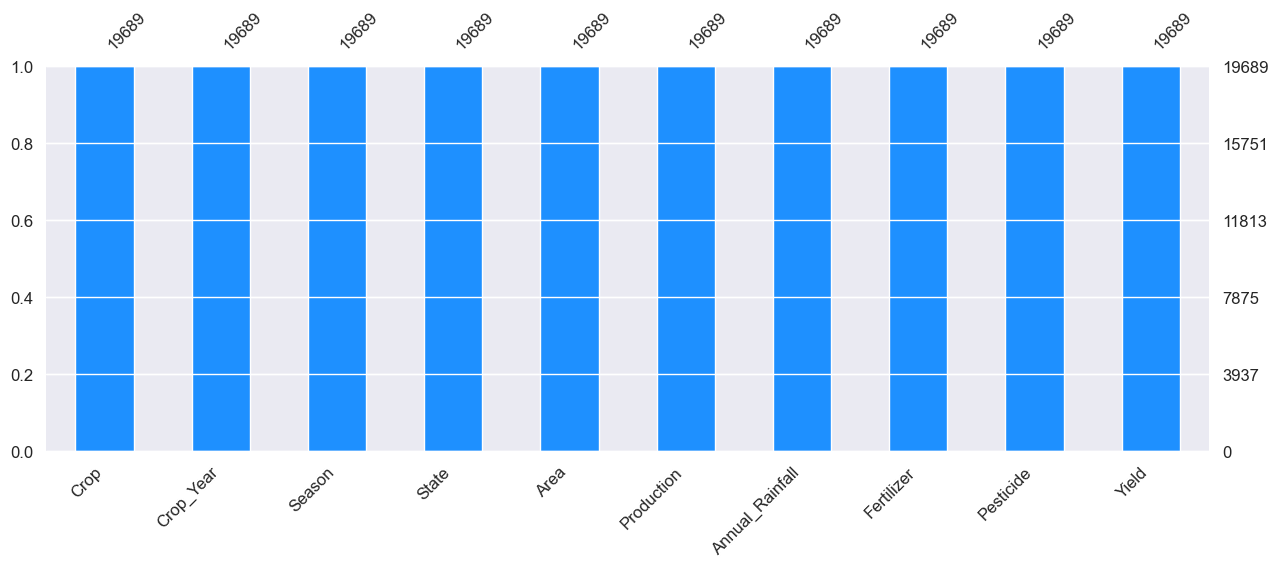

In [92]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

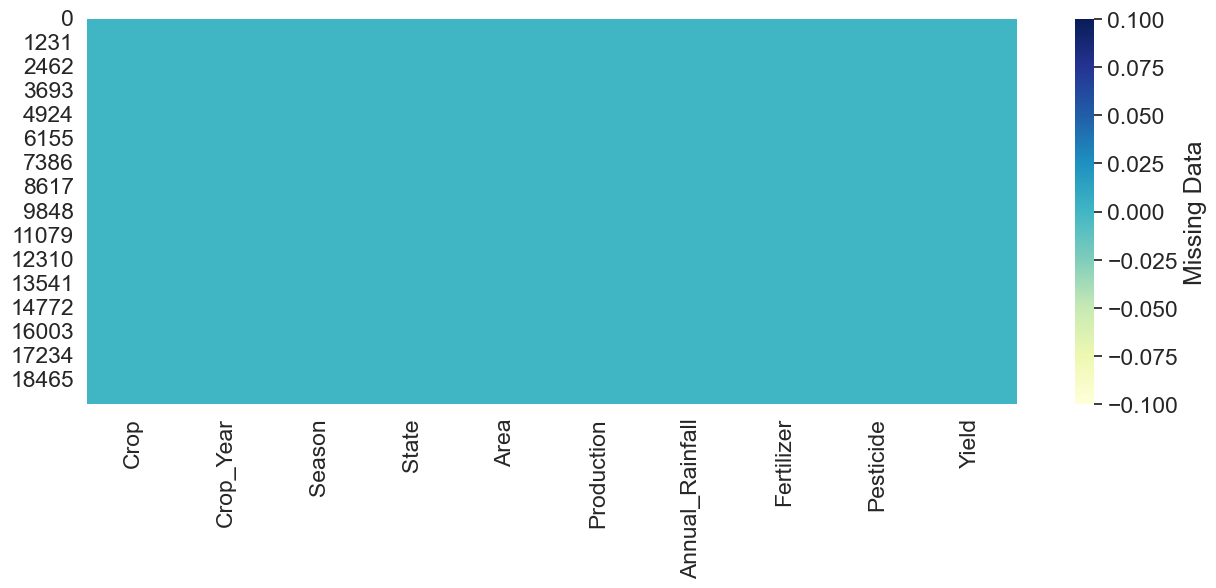

In [93]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'});

Two visualizations were created to assess the presence of missing data in the dataset:

---

#### **1. Missing Value Bar Plot (using `missingno`):**
- **Visualization Description:** 
  - A bar chart was generated to display the count of non-missing values for each column.
  - All columns were sorted in ascending order by the number of non-missing values.
  - The bars were colored in **dodgerblue** for clarity.
- **Key Observation:** 
  - All columns have complete data with no missing values, as evidenced by the bar heights reaching the total row count.

---

#### **2. Missing Value Heatmap (using `sns.heatmap`):**
- **Visualization Description:**
  - A heatmap was generated to display the locations of missing data.
  - The map uses a **YlGnBu** colormap, where missing values would typically appear as highlighted patches.
  - A color bar was added to indicate the presence of missing data.
- **Key Observation:** 
  - The heatmap confirms the absence of missing data, as no highlighted patches (indicating missing values) are visible.

---

#### **Insights:**
- **Validation:** Both visualizations corroborate that the dataset is free from missing values.
- **Efficiency:** These plots provide quick and intuitive validation of data completeness, especially useful for larger datasets.

With this confirmation, no further action regarding missing values is needed, and the dataset is ready for preprocessing and analysis.

### Separate numerical and categorical variable

In [94]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [95]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


### Correlation matrix for numeric columns

In [96]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


The numeric_data.corr() function was used to calculate the Pearson correlation coefficients between the numerical features in the dataset.
#### **Key Observations:**

1. **Strong Positive Correlations:**
   - **`Area` with `Fertilizer` (0.97) and `Pesticide` (0.97):**
     Indicates larger agricultural areas tend to use higher amounts of fertilizers and pesticides.
   - **`Fertilizer` and `Pesticide` (0.95):**
     Suggests a strong relationship between the use of fertilizers and pesticides.

2. **Moderate Positive Correlation:**
   - **`Production` with `Yield` (0.57):**
     Indicates a moderate relationship between crop production and yield, as expected.

3. **Negligible Correlations:**
   - Features like `Crop_Year`, `Annual_Rainfall`, and `Yield` show weak or negligible correlations with other features, suggesting limited direct linear relationships.

4. **Potential Multicollinearity:**
   - The high correlations between `Area`, `Fertilizer`, and `Pesticide` may indicate multicollinearity, which could affect regression model performance.

---

#### **Next Steps:**
- **Address Multicollinearity:** Consider techniques like Variance Inflation Factor (VIF) analysis to handle multicollinearity if these features are used in regression models.
- **Feature Engineering:** Explore non-linear relationships and interactions, especially for weakly correlated features like `Yield` and `Annual_Rainfall`.
- **Visualization:** Use heatmaps or pair plots to further analyze these relationships and confirm any potential insights.

This correlation analysis provides a quantitative understanding of feature relationships, guiding further preprocessing and model selection.

In [97]:
fig = px.imshow(numeric_data.corr(),text_auto=True,aspect="auto")
fig.show()

### Count details for each crop year

In [98]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64


The **`df['Crop_Year'].value_counts(ascending=False)`** function was used to analyze the distribution of records across different crop years. The results are summarized as follows:

---

#### **Crop Year Distribution:**

| **Crop Year** | **Record Count** | **Observations**                              |
|---------------|------------------|-----------------------------------------------|
| **2019**      | 1,079            | Highest number of records.                    |
| **2017**      | 1,070            | Second highest count, comparable to 2019.     |
| **2018**      | 1,063            | Consistently high representation.             |
| **2016**      | 1,036            | Also well-represented.                        |
| **2020**      | **37**           | Very few records, potentially insufficient.   |

- The crop years range from **1997 to 2020**, with **2019** having the highest number of records and **2020** the lowest.
- **Recent Years:** The records for recent years (e.g., 2016–2019) are abundant, providing good coverage for modeling.
- **Sparse Data for 2020:** Only **37 records** are available for 2020, which may not be statistically significant for analysis.

---

#### **Insights:**
- **Potential Exclusion of 2020:** Due to insufficient data, crop year 2020 might need exclusion from trend analyses or modeling.
- **Balanced Distribution:** Other years exhibit a balanced distribution, ensuring robust temporal analysis.

---

#### **Next Steps:**
- Consider filtering out 2020 from the dataset during preprocessing to avoid potential bias or noise.
- Investigate trends across well-represented years to understand temporal patterns in crop yield, production, and associated factors.

This analysis ensures a better understanding of the temporal scope and distribution of the dataset, guiding decisions for preprocessing and model design.

### Remove records for Year 2020

In [99]:
df = df[df['Crop_Year'] != 2020]

### **Report Description: Filtering Crop Year 2020**

The **`df[df['Crop_Year'] != 2020]`** operation was performed to remove records associated with the crop year 2020 from the dataset. This decision was based on the earlier observation of insufficient data for the year.

---

#### **Impact of Filtering:**
- **Crop Year 2020 Excluded:** All 37 records corresponding to the year 2020 have been removed from the dataset.
- **Remaining Dataset:** The dataset now includes crop years ranging from **1997 to 2019**, ensuring a more balanced and representative sample for analysis.

---

#### **Key Observations:**
- **Data Integrity:** By removing 2020, the dataset eliminates potential noise and bias due to the lack of sufficient data points for this year.
- **Enhanced Reliability:** The remaining data better supports temporal trend analysis and predictive modeling.

---

#### **Next Steps:**
- Recheck the shape of the dataset to confirm the updated record count.
- Proceed with further preprocessing and exploration of the revised dataset.

This step refines the dataset, aligning it with analytical goals and ensuring robust outcomes.

### Count details for each Crops

In [100]:
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small Millets             484
Cotton(Lint)              476
Onion                     453
Sunflower                 439
Dry Chillies              419
Other Kharif Pulses       381
Horse-Gram                370
Peas & Beans (Pulses)     368
Tobacco                   363
Other  Rabi Pulses        354
Soyabean                  348
Turmeric                  336
Masoor                    323
Ginger                    323
Linseed                   308
Castor Seed               300
Barley                    296
Sweet Potato              273
Garli

The **`df['Crop'].value_counts(ascending=False)`** function was used to analyze the distribution of crop types in the dataset. The results show the frequency of various crops across the records:

---

#### **Top 10 Most Frequent Crops:**

| **Crop**               | **Record Count** |
|------------------------|------------------|
| **Rice**               | 1,195            |
| **Maize**              | 973              |
| **Moong (Green Gram)** | 738              |
| **Urad**               | 731              |
| **Groundnut**          | 724              |
| **Sesamum**            | 684              |
| **Potato**             | 626              |
| **Sugarcane**          | 604              |
| **Wheat**              | 544              |
| **Rapeseed & Mustard**| 527              |

---

#### **Key Insights:**
- **Most Common Crop:** **Rice** is the most common crop in the dataset with 1,195 records, followed by **Maize** (973 records) and **Moong (Green Gram)** (738 records).
- **Diverse Crop Representation:** The dataset includes a wide variety of crops, including major food crops (e.g., Rice, Wheat, Maize), pulses (e.g., Moong, Urad), and oilseeds (e.g., Groundnut, Sesame).
- **Low Frequency Crops:** Certain crops like **Oilseeds Total** (29 records) and **Other Summer Pulses** (10 records) have very few records, which may not provide enough data for reliable analysis.

---

#### **Next Steps:**
- **Handling Low-Frequency Crops:** Crops with low frequency, especially those with less than 30 records, could either be excluded or grouped into broader categories (e.g., "Other" crops).
- **Feature Engineering:** Explore the impact of different crop types on yield prediction, focusing on the most frequent crops.
- **Visualization:** Plot the distribution of crop types using bar charts or pie charts for better insights into crop prevalence.

This crop distribution analysis informs decisions regarding data balancing and feature selection for further modeling.

### Count details for each Season

In [101]:
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

The **`df['Season'].value_counts(ascending=False)`** function was used to analyze the distribution of seasons in the dataset. The results show the frequency of records associated with each season:

---

#### **Season Distribution:**

| **Season**     | **Record Count** |
|----------------|------------------|
| **Kharif**     | 8,215            |
| **Rabi**       | 5,732            |
| **Whole Year** | 3,712            |
| **Summer**     | 1,190            |
| **Autumn**     | 414              |
| **Winter**     | 389              |

---

#### **Key Insights:**
- **Most Frequent Season:** **Kharif** (8215 records) is the most prevalent season, followed by **Rabi** (5732 records) and **Whole Year** (3712 records). These are the dominant seasons for crop cultivation in the dataset.
- **Less Frequent Seasons:** **Summer**, **Autumn**, and **Winter** seasons have much fewer records, with **Winter** having the least (389 records).
- **Seasonal Distribution:** The data is largely dominated by two main cropping seasons, **Kharif** and **Rabi**, with lesser representation of other seasons.

---

This seasonal distribution analysis helps guide decisions regarding the importance of seasonality in crop yield prediction and model performance.

### Count Details for each State

In [102]:
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Jammu And Kashmir     631
Haryana               631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Punjab                397
Telangana             397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

The **`df['State'].value_counts(ascending=False)`** function was used to analyze the distribution of records across different states in the dataset. The results show the frequency of records for each state:

---

#### **Top 10 States by Record Count:**

| **State**              | **Record Count** |
|------------------------|------------------|
| **Karnataka**          | 1,432            |
| **Andhra Pradesh**     | 1,266            |
| **West Bengal**        | 1,094            |
| **Chhattisgarh**       | 915              |
| **Bihar**              | 896              |
| **Madhya Pradesh**     | 845              |
| **Uttar Pradesh**      | 825              |
| **Tamil Nadu**         | 822              |
| **Gujarat**            | 817              |
| **Maharashtra**        | 770              |

---

#### **Key Insights:**
- **Most Represented State:** **Karnataka** has the highest number of records (1,432), followed by **Andhra Pradesh** (1,266) and **West Bengal** (1,094).
- **States with Fewer Records:** Some states like **Arunachal Pradesh** (292), **Jharkhand** (270), and **Goa** (246) have relatively fewer records, which might not provide as much statistical power for analysis.
- **Geographic Diversity:** The dataset covers a wide range of states across India, with representation from both major agricultural hubs and less-represented regions.

This state distribution analysis assists in understanding the geographic scope of the dataset and guides decisions related to feature engineering and model training.

### Crop yield per state

In [103]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


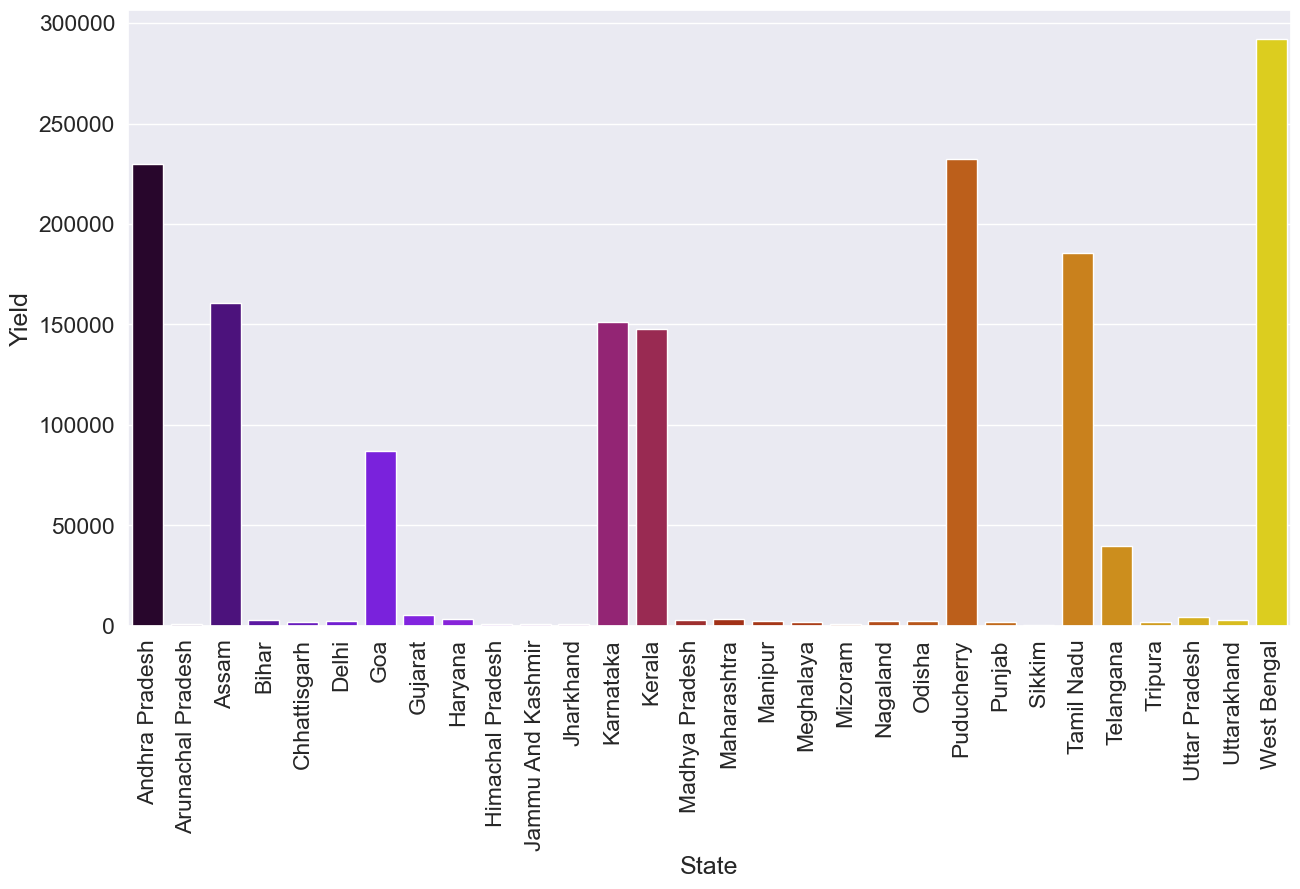

In [104]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

The **`df.groupby('State', as_index=False)['Yield'].sum()`** method was used to group the data by state and calculate the total yield for each state. The data was then sorted by total yield in descending order. The results were visualized using a bar plot to display the yield distribution across states.

---

#### **Visualization: Total Yield by State**

A bar plot was generated to visually represent the total yield of crops for each state. The plot is sorted in descending order, with the states having the highest crop yield displayed on the left.

---

#### **Key Insights:**
- **Highest Yielding States:** The states with the highest total crop yield are likely to be major agricultural hubs. This could be due to factors like favorable climate, irrigation facilities, and crop variety.
- **Comparative Yield Performance:** The visualization makes it easier to compare the crop yield performance across different states and identify trends or outliers.
- **Region-wise Analysis:** This analysis can guide decisions regarding region-specific interventions, agricultural policies, or crop management strategies.

---

This total yield analysis by state provides valuable insights for strategic planning, regional agricultural improvements, and model feature engineering.

### Yield Trend over the year

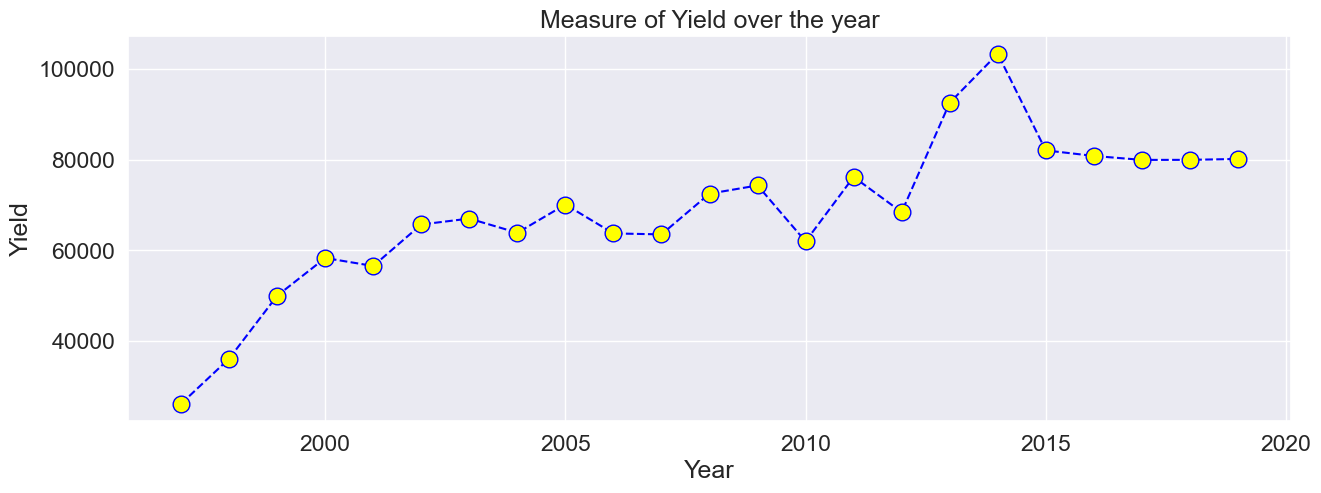

In [105]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

### Top 10 States by Total Yield

In [106]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


The top 10 states by total yield were identified using the sorted values of crop yields from the dataset. The results show the states that contribute the most to the total yield, allowing for a deeper understanding of regional agricultural performance.

---

#### **Top 10 States by Total Yield:**

| **Rank** | **State**       | **Total Yield (in Metric Tons)** |
|----------|-----------------|----------------------------------|
| 1        | **West Bengal**  | 291,986.75                      |
| 2        | **Puducherry**   | 232,163.60                      |
| 3        | **Andhra Pradesh** | 229,735.18                      |
| 4        | **Tamil Nadu**   | 185,813.28                      |
| 5        | **Assam**        | 160,612.65                      |
| 6        | **Karnataka**    | 151,391.87                      |
| 7        | **Kerala**       | 147,710.35                      |
| 8        | **Goa**          | 87,275.96                       |
| 9        | **Telangana**    | 39,508.73                       |
| 10       | **Gujarat**      | 5,471.63                        |

---

#### **Key Insights:**
- **Top Yielding State:** **West Bengal** leads with a total yield of 291,986.75 metric tons, followed by **Puducherry** and **Andhra Pradesh** with yields of 232,163.60 and 229,735.18 metric tons respectively.
- **Notable High-Yielding Regions:** States like **Tamil Nadu**, **Assam**, and **Karnataka** contribute significantly to the overall yield, showcasing their importance in India's agricultural output.
- **Smaller Contributors:** **Gujarat** and **Telangana** have much lower total yields in comparison, with **Gujarat** ranking 10th with 5,471.63 metric tons.

---

This analysis of top 10 states by yield can inform resource allocation, agricultural policy, and strategic decisions for improving crop productivity across India.

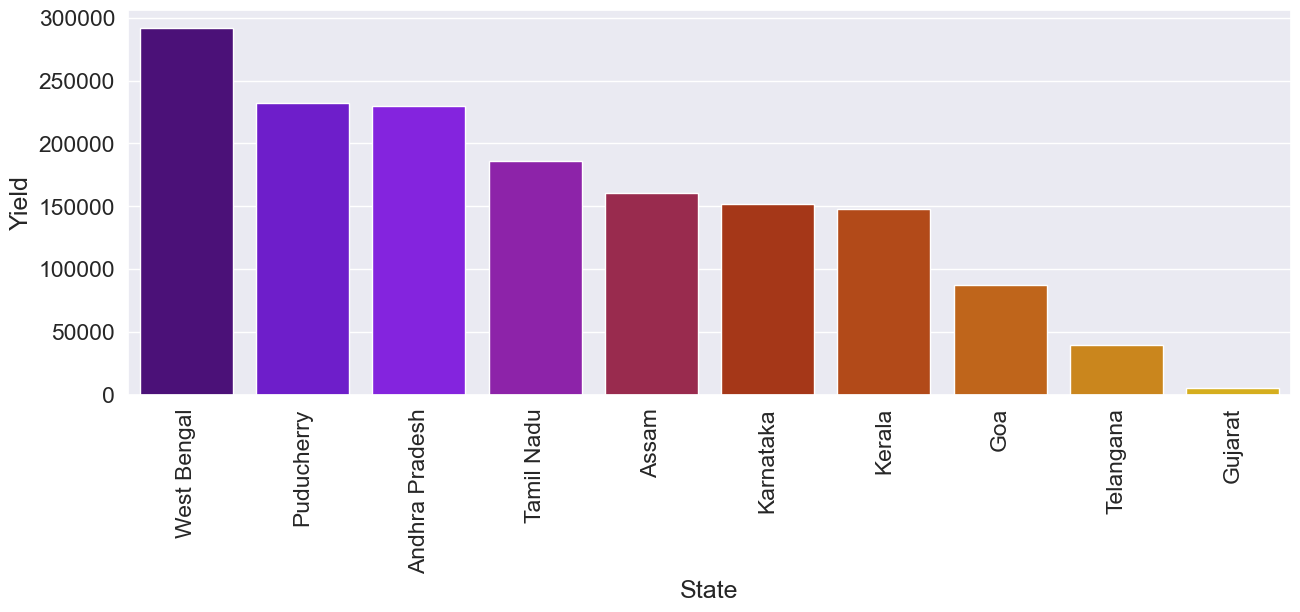

In [107]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Annual Rainfall per state

In [108]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


The analysis of the total annual rainfall across states provides valuable insight into regions that receive the highest levels of precipitation, which is a critical factor for agricultural productivity.

---

#### **Top 10 States by Total Annual Rainfall:**

| **Rank** | **State**       | **Total Annual Rainfall (mm)** |
|----------|-----------------|--------------------------------|
| 1        | **Meghalaya**    | 2,623,959.14                  |
| 2        | **West Bengal**  | 1,883,455.70                  |
| 3        | **Karnataka**    | 1,692,392.73                  |
| 4        | **Kerala**       | 1,536,641.30                  |
| 5        | **Assam**        | 1,531,493.36                  |
| 6        | **Andhra Pradesh** | 1,160,139.90                  |
| 7        | **Chhattisgarh** | 1,159,347.20                  |
| 8        | **Odisha**       | 1,098,412.40                  |
| 9        | **Nagaland**     | 1,064,884.45                  |
| 10       | **Bihar**        | 1,042,239.50                  |

---

#### **Key Insights:**
- **Highest Rainfall Region:** **Meghalaya** leads with the highest total annual rainfall of 2,623,959.14 mm, followed by **West Bengal** and **Karnataka**, which also receive significant rainfall.
- **Consistently High Rainfall States:** **Kerala**, **Assam**, and **Andhra Pradesh** are also among the top contributors to total annual rainfall, essential for sustaining agriculture.
- **Southern and Eastern Regions:** A pattern of high rainfall is observed in southern and eastern states, including **Tamil Nadu**, **Odisha**, and **Nagaland**, which is critical for crops depending on monsoon patterns.
- **Relatively Lower Rainfall in North and West:** States like **Delhi**, **Punjab**, and **Haryana** receive considerably lower rainfall compared to the top states.

---

This rainfall analysis provides insights that can guide policies on water management, irrigation, and crop selection for different states based on their climatic conditions.

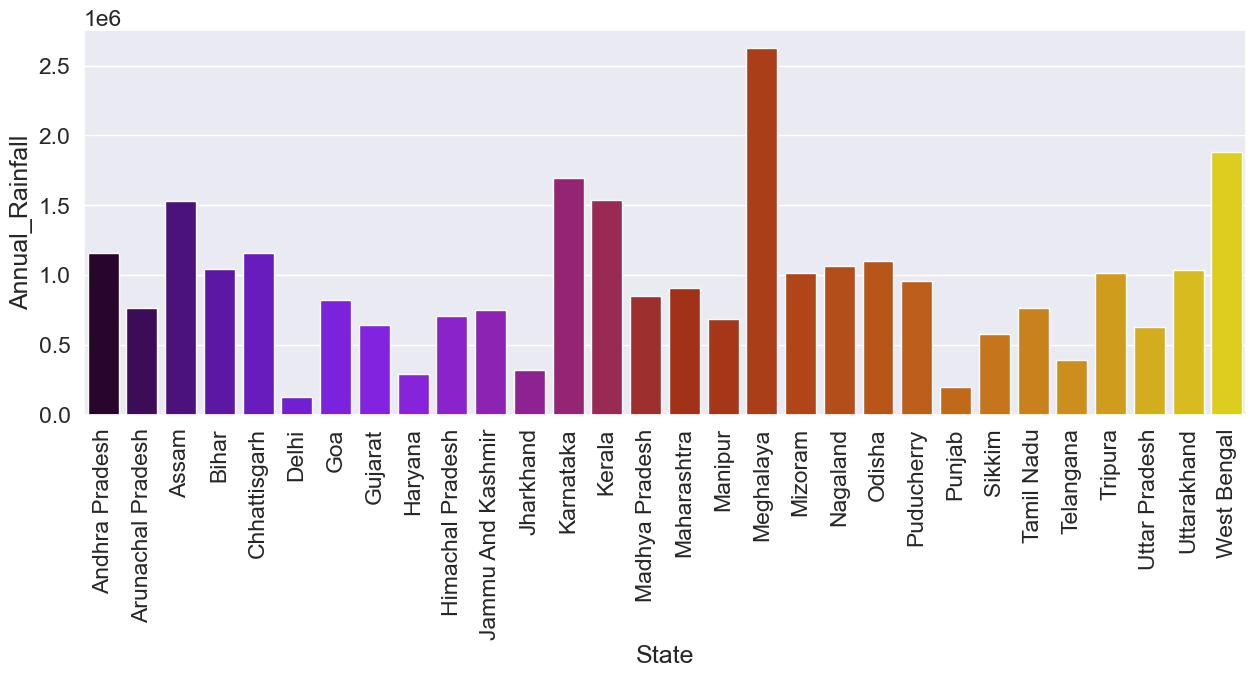

In [109]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Annual Rainfall trend over the year

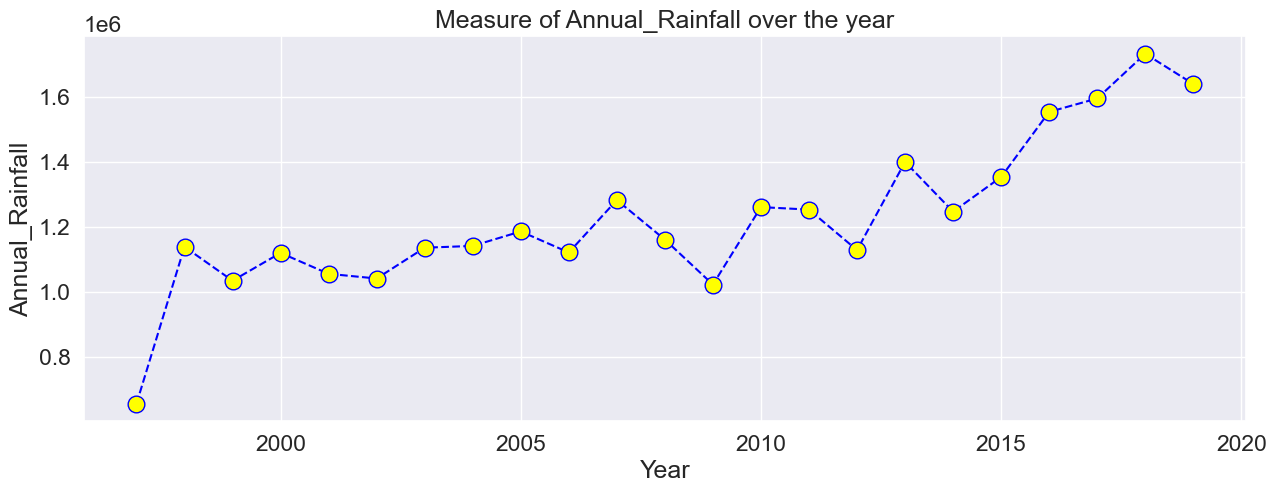

In [110]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

### Top 10 States by Total Annual Rainfall

In [111]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


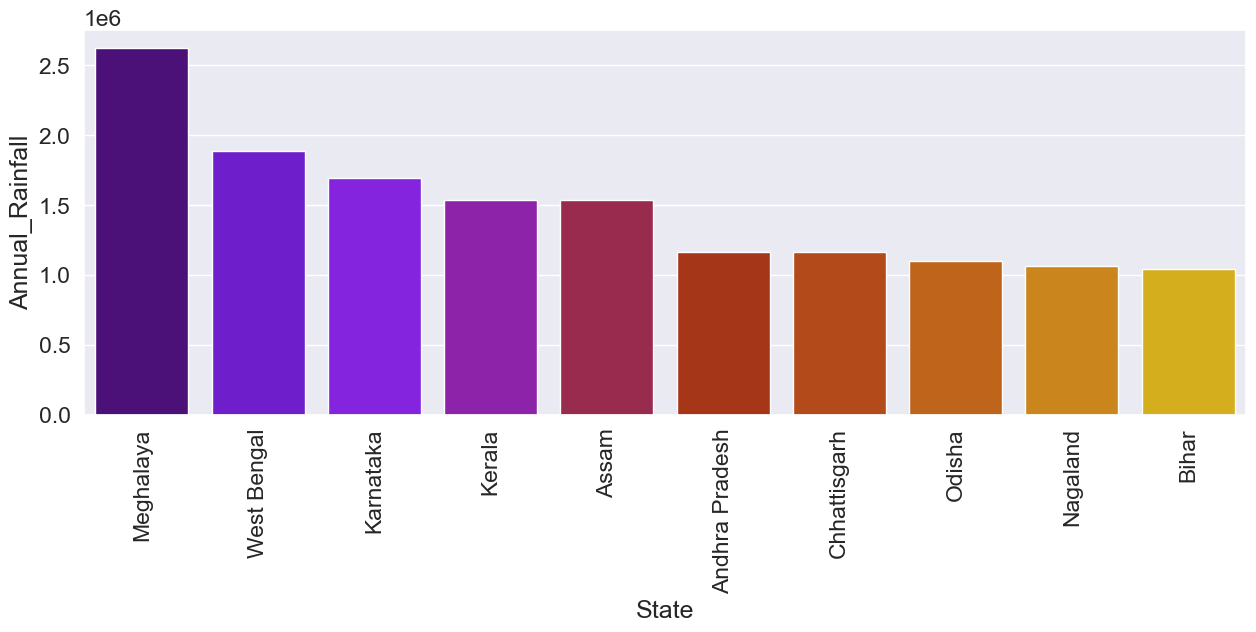

In [112]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Area per state

In [113]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


The analysis of total agricultural area across states provides a comprehensive view of the land dedicated to farming activities. Understanding the area distribution is vital for estimating crop production potential and agricultural planning.

---

#### **Top 10 States by Total Agricultural Area:**

| **Rank** | **State**           | **Total Agricultural Area (in hectares)** |
|----------|---------------------|------------------------------------------|
| 1        | **Uttar Pradesh**    | 54,267,263.50                            |
| 2        | **Madhya Pradesh**   | 49,208,799.45                            |
| 3        | **Maharashtra**      | 46,193,955.22                            |
| 4        | **Karnataka**        | 25,790,739.90                            |
| 5        | **Andhra Pradesh**   | 23,892,533.50                            |
| 6        | **West Bengal**      | 23,768,226.49                            |
| 7        | **Gujarat**          | 22,243,433.32                            |
| 8        | **Bihar**            | 16,799,543.10                            |
| 9        | **Punjab**           | 16,204,020.00                            |
| 10       | **Haryana**          | 13,150,699.36                            |

---

#### **Key Insights:**
- **Largest Agricultural Area:** **Uttar Pradesh** leads with the largest agricultural area, covering over 54 million hectares, followed by **Madhya Pradesh** and **Maharashtra** with significant land dedicated to farming.
- **Southern States:** States like **Karnataka** and **Andhra Pradesh** also feature prominently, indicating their vast agricultural lands that contribute significantly to India's crop production.
- **Diverse Agricultural Landscape:** Regions such as **West Bengal**, **Gujarat**, and **Bihar** showcase substantial areas under cultivation, reflecting their importance in India's agricultural economy.
- **Smaller Areas in the North-East and Coastal Regions:** States such as **Meghalaya**, **Goa**, and **Puducherry** have relatively smaller agricultural areas, suggesting less land devoted to crop production in these regions.

---

This area analysis can help prioritize states for investment in agricultural infrastructure and technology to enhance crop yields, promote sustainable practices, and ensure food security.

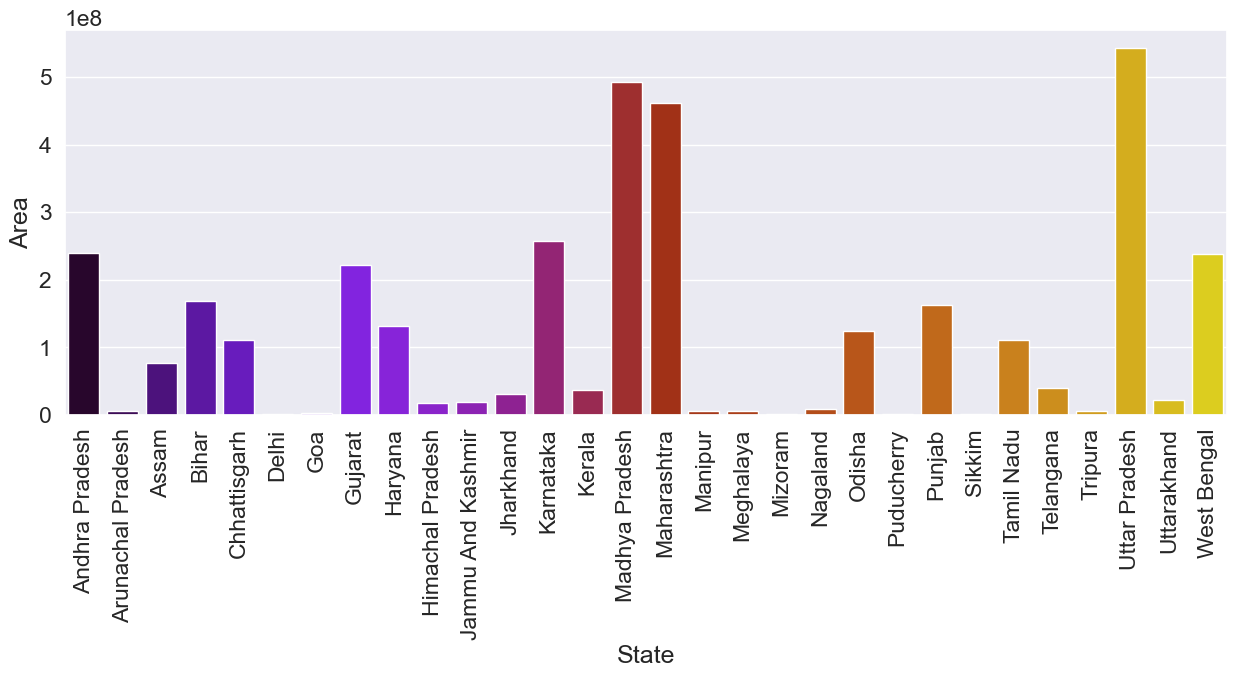

In [114]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Area trend over the year

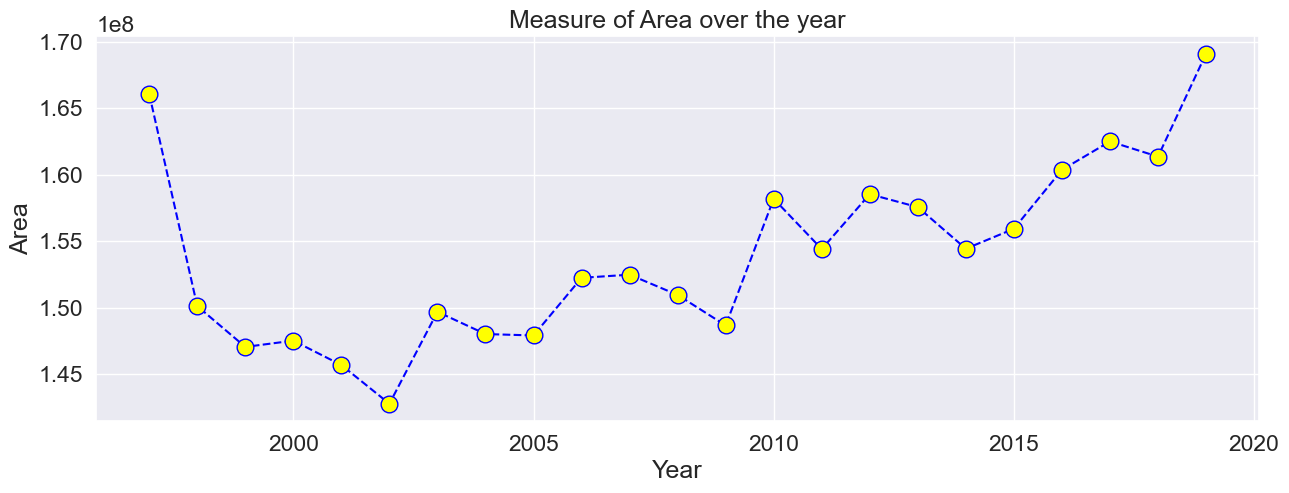

In [115]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

### Top 10 States by Total Area

In [116]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


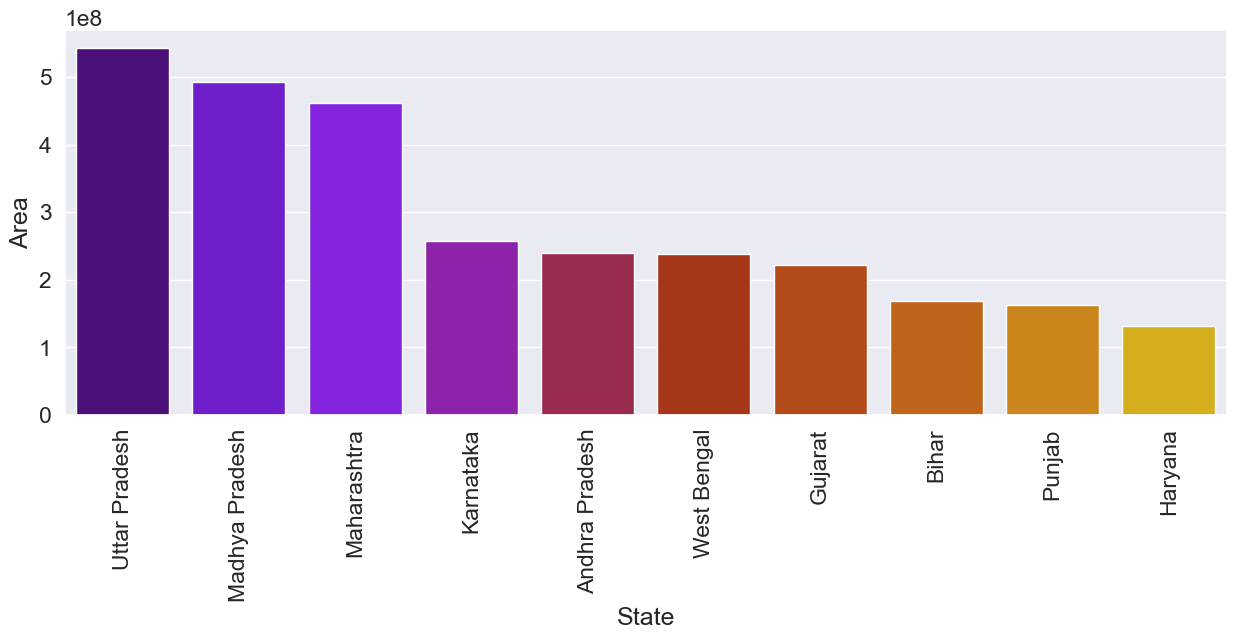

In [117]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Production per state

In [118]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


The analysis of total agricultural production across different states is essential for understanding regional contributions to India's agricultural economy. This data can provide insights into where the highest levels of crop output are being achieved and how it correlates with land area, rainfall, and other factors.

---

#### **Top 10 States by Total Agricultural Production (in value):**

| **Rank** | **State**           | **Total Agricultural Production (INR)**   |
|----------|---------------------|------------------------------------------|
| 1        | **Kerala**           | ₹1,29,700,649,853                        |
| 2        | **Tamil Nadu**       | ₹78,051,759,253                          |
| 3        | **Karnataka**        | ₹63,772,797,366                          |
| 4        | **Andhra Pradesh**   | ₹26,076,218,605                          |
| 5        | **West Bengal**      | ₹8,941,179,120                           |
| 6        | **Uttar Pradesh**    | ₹4,442,585,302                           |
| 7        | **Assam**            | ₹3,637,714,928                           |
| 8        | **Goa**              | ₹2,193,998,349                           |
| 9        | **Maharashtra**      | ₹1,878,564,915                           |
| 10       | **Madhya Pradesh**   | ₹834,490,323                             |

---

#### **Key Insights:**
- **Leading Producers:** **Kerala** emerges as the top state with the highest agricultural production value, followed by **Tamil Nadu** and **Karnataka**, indicating their significant contributions to national agricultural output.
- **Southern and Western States Dominate:** The top states in terms of production are primarily from the southern and western regions, with **Kerala**, **Tamil Nadu**, **Karnataka**, and **Andhra Pradesh** dominating the top ranks. 
- **Lower Production in Northern States:** While **Uttar Pradesh** and **Assam** contribute significantly, the production values of states like **West Bengal** and **Madhya Pradesh** are relatively lower compared to their area and rainfall.
- **Smaller Agricultural Economies:** States such as **Delhi**, **Sikkim**, and **Mizoram** contribute the least to the total agricultural production, possibly due to smaller land areas or more specialized production of certain crops.

---

This analysis helps in identifying the most productive regions in India, allowing policymakers and agricultural bodies to focus on these states for enhancing supply chains, improving yields, and boosting overall agricultural sustainability.

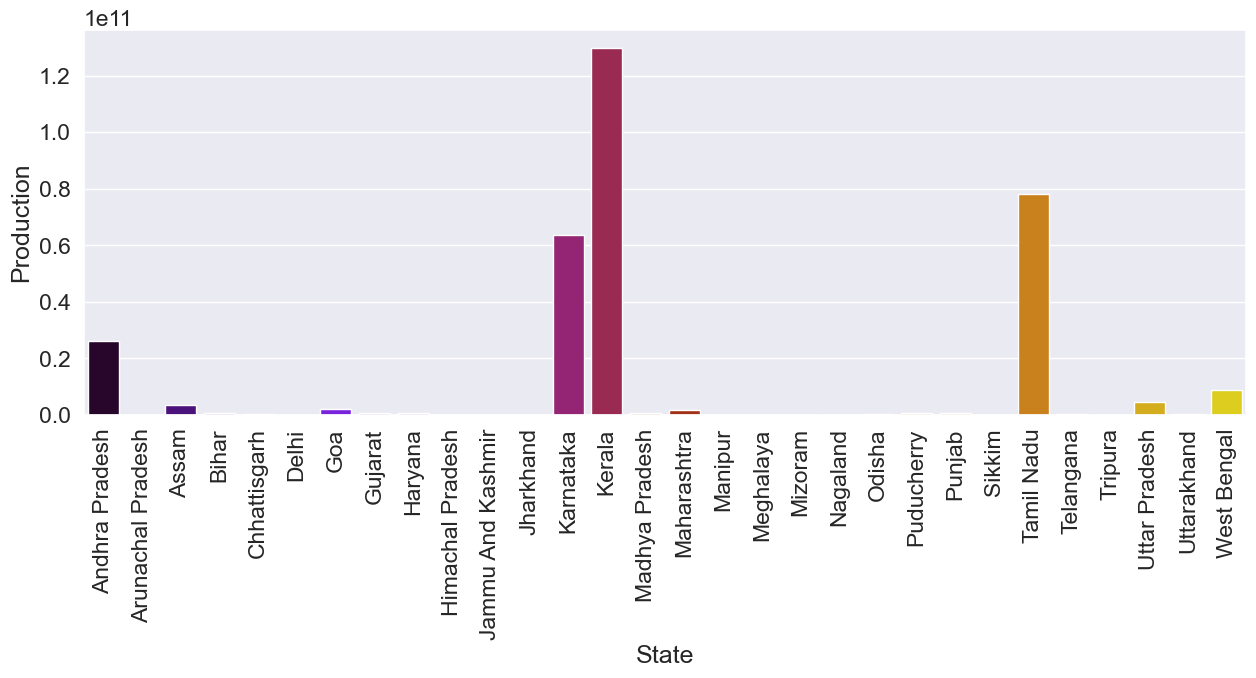

In [119]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Production trend over the year

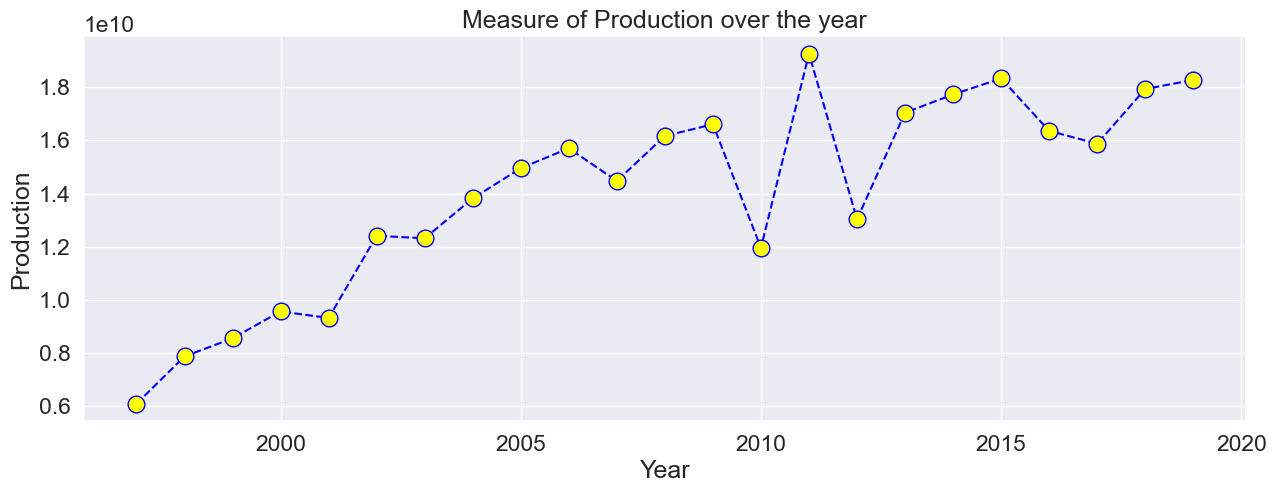

In [120]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

### Top 10 States by Total Production

In [121]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


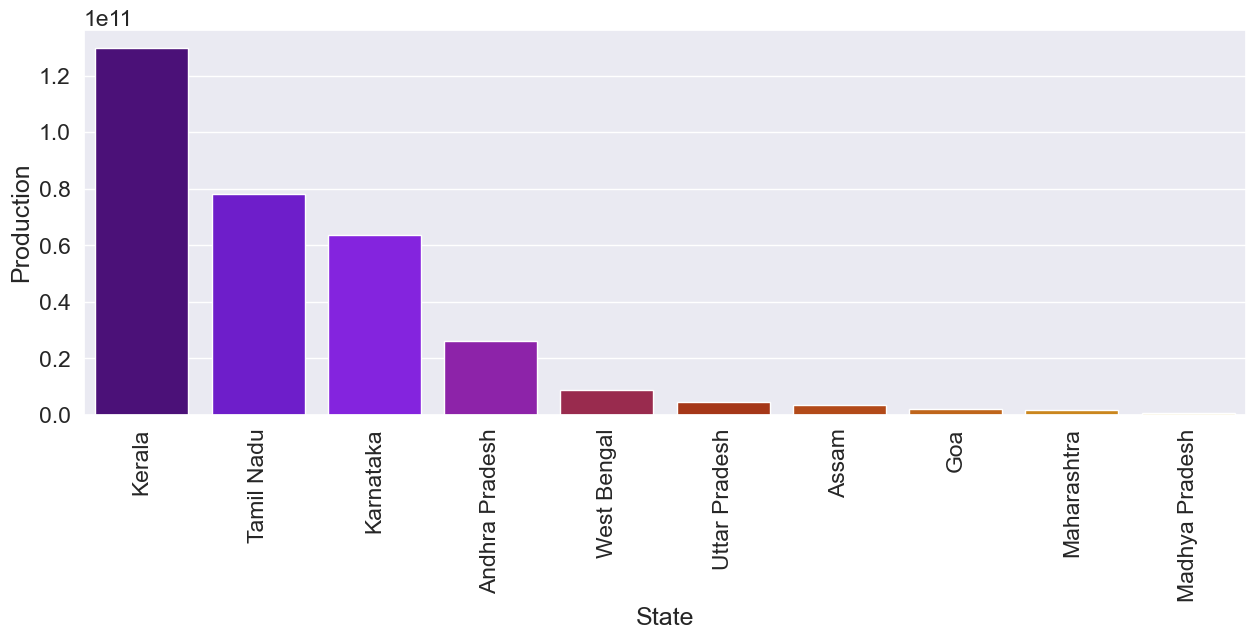

In [122]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Fertilizer per state

In [123]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


Fertilizer use is a critical indicator of agricultural intensity and productivity. The quantity of fertilizer used in different states can help understand the levels of input into crop production and give insights into agricultural practices in various regions.

---

#### **Top 10 States by Total Fertilizer Usage (INR):**

| **Rank** | **State**           | **Total Fertilizer Usage (INR)**         |
|----------|---------------------|-----------------------------------------|
| 1        | **Uttar Pradesh**    | ₹72,452,818,301.10                      |
| 2        | **Madhya Pradesh**   | ₹67,088,002,956.53                      |
| 3        | **Maharashtra**      | ₹62,389,066,345.90                      |
| 4        | **Karnataka**        | ₹34,580,241,907.79                      |
| 5        | **Andhra Pradesh**   | ₹31,258,901,413.96                      |
| 6        | **Gujarat**          | ₹29,930,280,998.95                      |
| 7        | **West Bengal**      | ₹29,704,801,335.98                      |
| 8        | **Bihar**            | ₹22,202,119,051.38                      |
| 9        | **Punjab**           | ₹21,652,297,765.00                      |
| 10       | **Haryana**          | ₹17,645,132,988.55                      |

---

#### **Key Insights:**
- **Fertilizer Usage Dominates in Northern and Central States:** **Uttar Pradesh**, **Madhya Pradesh**, and **Maharashtra** lead the way in fertilizer consumption, suggesting high agricultural activity and input in these regions.
- **Southern and Western States:** While **Karnataka** and **Andhra Pradesh** rank in the top 5, states like **Tamil Nadu** and **Kerala** have relatively lower fertilizer usage compared to their production levels.
- **Punjab and Haryana:** These states, with their strong focus on wheat and rice production, also show significant fertilizer consumption, aligning with the known agricultural intensity in the region.

---
This analysis emphasizes the need for balanced fertilizer application and more sustainable agricultural practices to ensure long-term soil health and agricultural productivity.

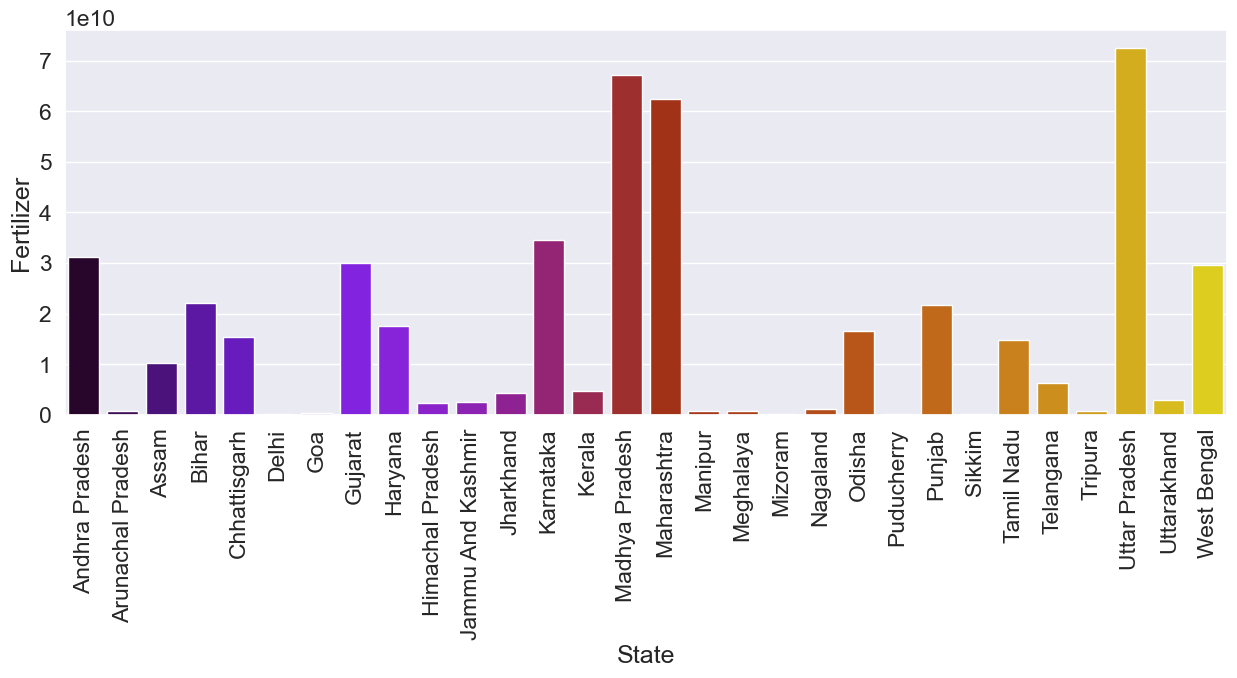

In [124]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Fertilizer trend over the year

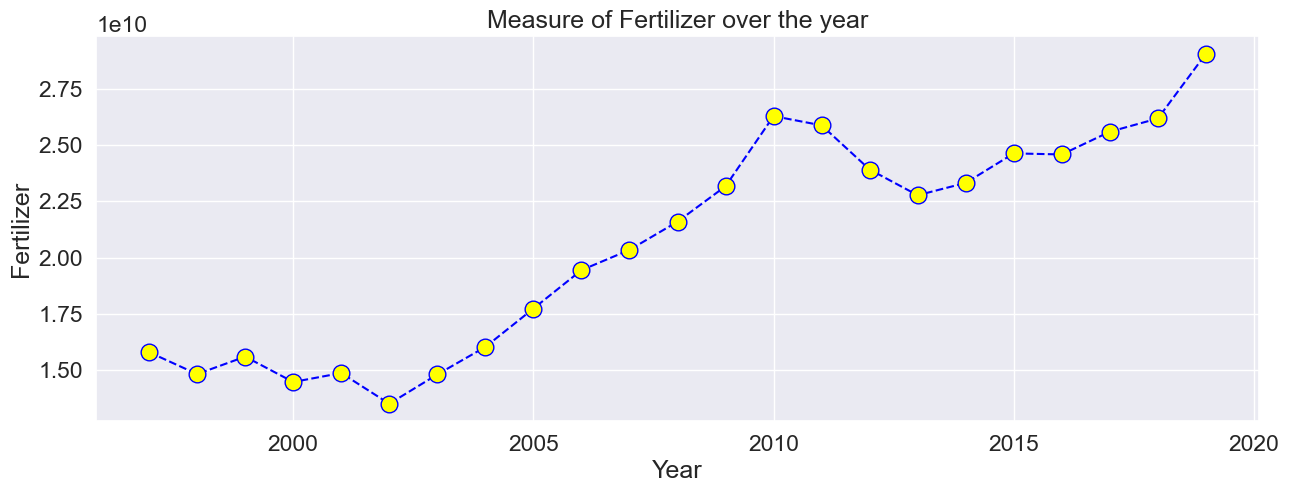

In [125]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

### Top 10 States by Total Fertilizer

In [126]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


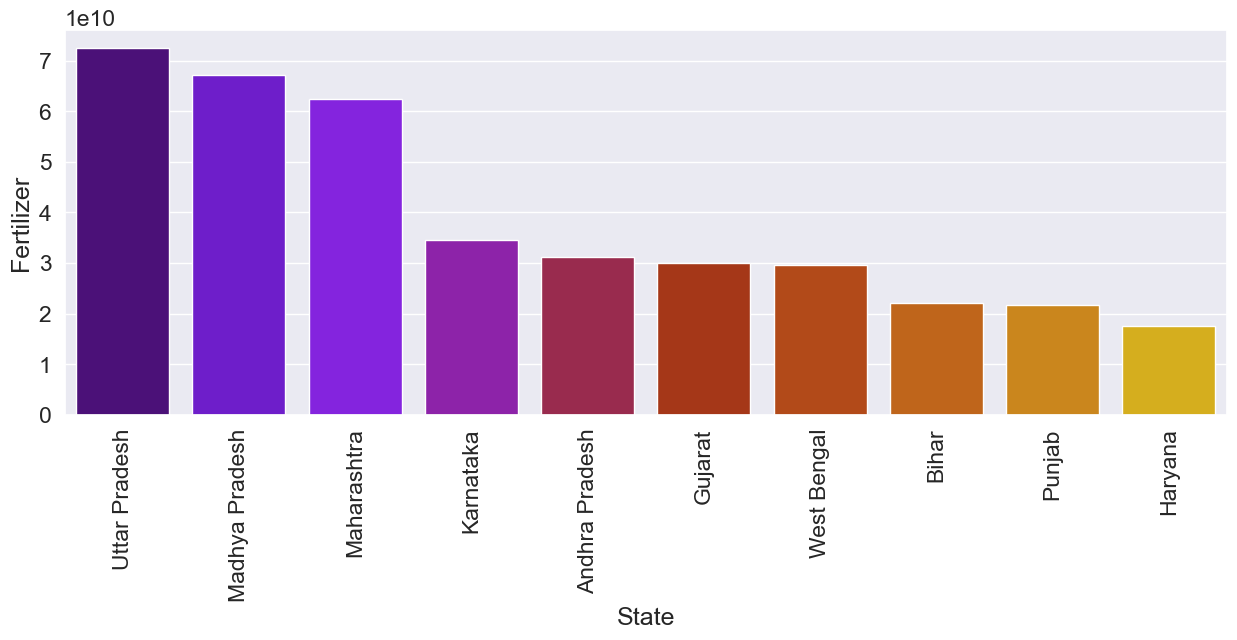

In [127]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Pesticide per state

In [128]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


Pesticide usage is a significant factor in crop protection and pest management. The amount of pesticide used in various states reflects both the intensity of agricultural production and the prevalence of pest-related challenges.

---

#### **Top 10 States by Total Pesticide Usage (INR):**

| **Rank** | **State**           | **Total Pesticide Usage (INR)**          |
|----------|---------------------|-----------------------------------------|
| 1        | **Uttar Pradesh**    | ₹147,133,481.22                         |
| 2        | **Madhya Pradesh**   | ₹135,990,782.02                         |
| 3        | **Maharashtra**      | ₹124,688,508.91                         |
| 4        | **Karnataka**        | ₹69,173,115.92                          |
| 5        | **West Bengal**      | ₹66,126,649.48                          |
| 6        | **Andhra Pradesh**   | ₹62,107,242.85                          |
| 7        | **Gujarat**          | ₹60,067,111.89                          |
| 8        | **Bihar**            | ₹45,310,803.07                          |
| 9        | **Punjab**           | ₹43,752,763.00                          |
| 10       | **Haryana**          | ₹35,710,255.77                          |

---

#### **Key Insights:**
- **Northern and Central States Dominate Pesticide Usage:** **Uttar Pradesh**, **Madhya Pradesh**, and **Maharashtra** lead in pesticide usage, indicating these states are likely facing pest challenges on a larger scale, possibly due to crop diversity and large-scale farming.
- **Southern States:** While **Karnataka** and **Andhra Pradesh** show considerable pesticide use, the figures are lower than those from the north. This may be due to different crop types, climate conditions, and pest management practices.
- **Punjab and Haryana:** These states, major agricultural hubs for crops like rice and wheat, reflect high pesticide consumption. This suggests intensive pest management practices are in place to safeguard large-scale crop production.

By promoting balanced pesticide use and introducing sustainable pest management practices, these states can work toward enhancing agricultural productivity while safeguarding the environment.

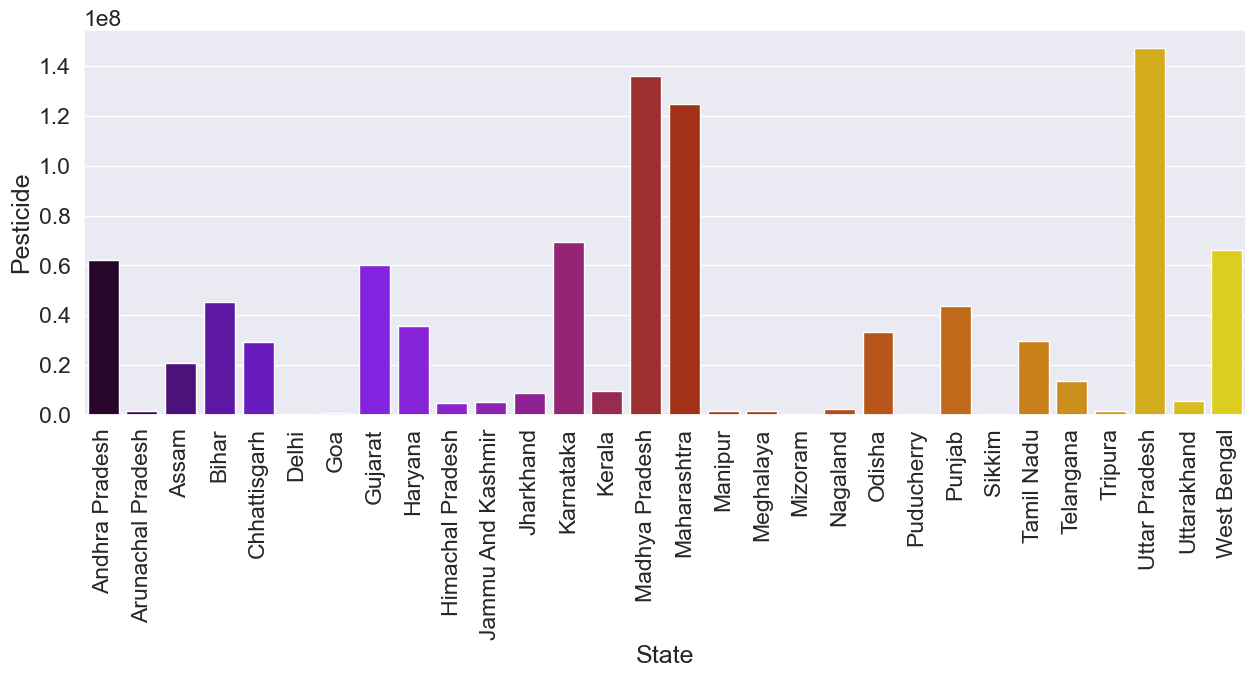

In [129]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Pesticide trend over the year

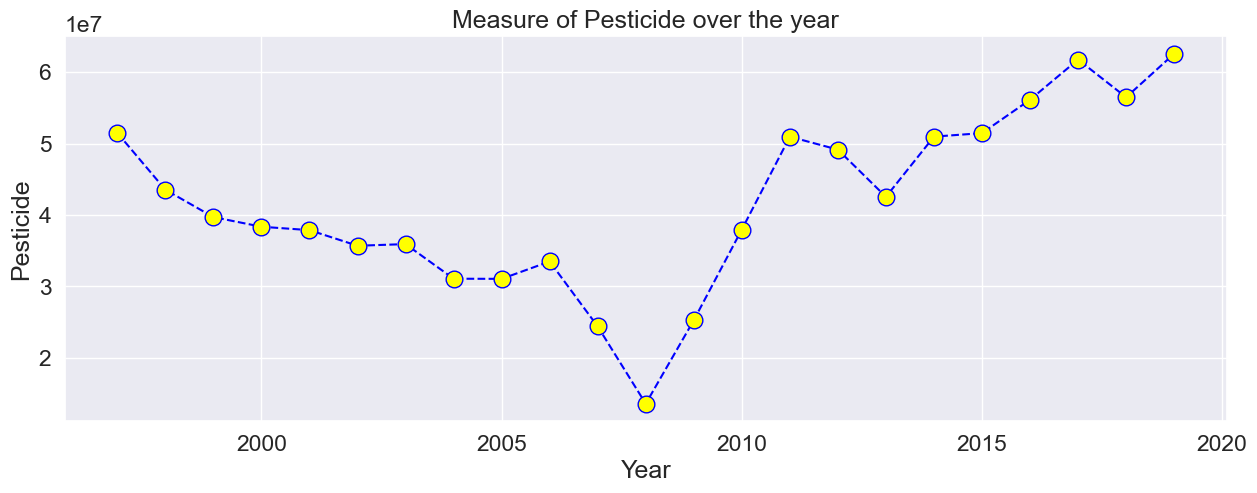

In [130]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

### Top 10 States by Total Pesticide

In [131]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


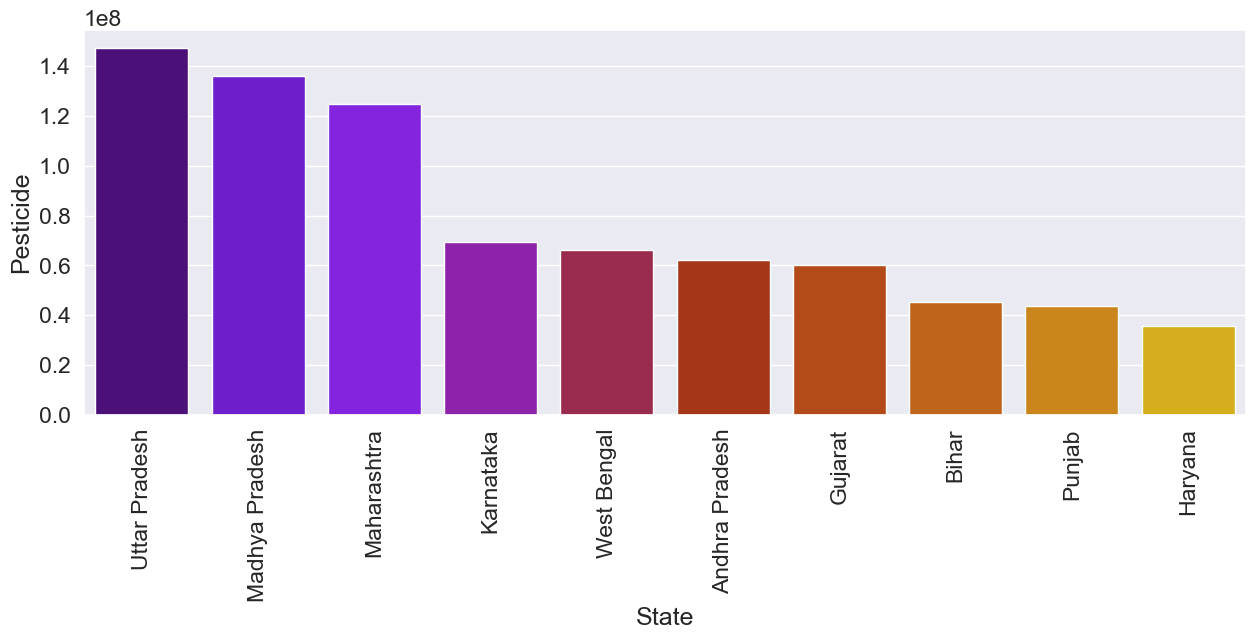

In [132]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

# Modelling without EDA

In [133]:
df_without_eda = df.copy()

In [134]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


By directly including both Production and Area as features in the model to predict Yield, we are essentially giving the model the exact answer since it only needs to divide Production by Area. This defeats the purpose of using the model to predict Yield, as the relationship becomes trivial for the model to learn.

In [135]:
# Drop 'Area' and 'Production' columns
df_without_eda = df_without_eda.drop(['Area', 'Production'], axis=1)

In [136]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,2051.40,165500.63,539.09,0.42


### One-Hot Encoding

In [137]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [138]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [139]:
df_without_eda.shape

(19652, 93)

In [140]:
df_without_eda.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,2051.40,631643.29,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,2051.40,75755.32,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,2051.40,1870661.52,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,2051.40,165500.63,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [141]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [142]:
df_without_eda.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1997,2051.40,631643.29,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,2051.40,75755.32,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,2051.40,1870661.52,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1997,2051.40,165500.63,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split the data into dependent and independent variable

In [143]:
x = df_without_eda.drop(['Yield'], axis = 1)
y = df_without_eda['Yield']

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 92)
y_train - >   (15721,)
x_test  - >   (3931, 92)
y_test  - >   (3931,)


In [146]:
x_train.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
13194,2013,452.20,563511.00,1053.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13943,2014,382.70,4257072.00,9306.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8762,2003,1075.60,56109386.48,136050.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4788,2016,890.00,1018039.75,2325.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1795,2005,1316.20,5555054.16,9727.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
x_train.to_csv('dataset.csv', index=False)

In [148]:
x_train.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
13194,2013,452.20,563511.00,1053.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13943,2014,382.70,4257072.00,9306.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8762,2003,1075.60,56109386.48,136050.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4788,2016,890.00,1018039.75,2325.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1795,2005,1316.20,5555054.16,9727.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
columns_to_drop = ['State_Arunachal Pradesh','State_Assam','State_Bihar','State_Chhattisgarh','State_Delhi','State_Goa','State_Gujarat','State_Haryana','State_Himachal Pradesh','State_Jammu And Kashmir','State_Jharkhand','State_Karnataka','State_Kerala','State_Madhya Pradesh','State_Maharashtra','State_Manipur','State_Meghalaya','State_Mizoram','State_Nagaland','State_Odisha','State_Puducherry','State_Punjab','State_Sikkim', 'State_Tamil Nadu','State_Telangana','State_Tripura','State_Uttar Pradesh','State_Uttarakhand','State_West Bengal']

x_train = x_train.drop(columns=columns_to_drop)
x_test = x_test.drop(columns=columns_to_drop)

In [150]:
x_train.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
13194,2013,452.20,563511.00,1053.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
13943,2014,382.70,4257072.00,9306.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8762,2003,1075.60,56109386.48,136050.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4788,2016,890.00,1018039.75,2325.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1795,2005,1316.20,5555054.16,9727.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [151]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [152]:
model.score(x_test, y_test)

0.9523290298550446

In [153]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)